# 1. 전처리

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

training_data = pd.read_csv('cs-training.csv')
test_data = pd.read_csv('cs-test.csv')
print(training_data.shape)
training_data.head(3)

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [2]:
# Rename "Unnamed:0" column name to "ID"
training_data.rename(columns= {"Unnamed: 0":"ID"}, inplace=True)
test_data.rename(columns= {"Unnamed: 0":"ID"}, inplace=True)

# Print first 5 records
training_data.head()
# test_data.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# Drop unnamed:0 heading 트레이닝데이터셋의.
training_data_drop_col = pd.read_csv('./cs-training.csv', sep=',').drop('Unnamed: 0', axis =1)

In [4]:
training_data_drop_col.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
test_data_drop_col = pd.read_csv('./cs-test.csv', sep=',').drop('Unnamed: 0', axis =1)
test_data_drop_col.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
# Replcaing the -없에주고 소문자로 바꿔줌

cleancolumns = []
for i in range(len(training_data_drop_col.columns)):
    cleancolumns.append(training_data_drop_col.columns[i].replace('-','').lower())
training_data_drop_col.columns = cleancolumns


In [7]:
cleancolumns = []
for i in range(len(test_data_drop_col.columns)):
    cleancolumns.append(test_data_drop_col.columns[i].replace('-','').lower())
test_data_drop_col.columns = cleancolumns

In [8]:
# 소문자로바뀐 데이터셋
training_data=training_data_drop_col
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
test_data=test_data_drop_col
test_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


# 2. EDA
1) 통계속성나열 2) 결측값 찾고 바꾸기 3) 상관분석 4) 이상점 검출

In [10]:
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
# 중위수
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [12]:
# 평균
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

### y값에 대한 도수분포 찾고 퍼센테이지까지 같이 그려주는 코드
## 0이 미연체, 1이 연체

In [13]:
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

# 아래 차트로 불균형 데이터 확인!

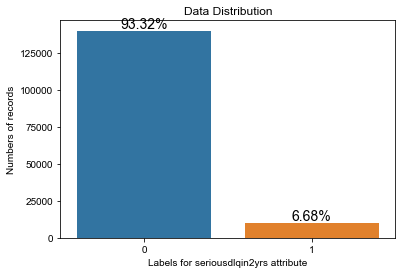

In [14]:
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           '{:.2f}%'.format(100*(height/total_len)),
           fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [15]:
# 결측값은 보통 1) 평균값 2) 중위수 값 으로 대체한다. 
# 혹은 레코드삭제, knn 등의 다양한 방법을 사용해도 된다.
# 이 연산을 결측값 대치(imputing)이라고 부른다.
# 더 좋은 결과가 나온것으로 사용한다. 계속 바꾼다. '시행착오법' 이라고 한다.
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

# 결측 그래프 생성

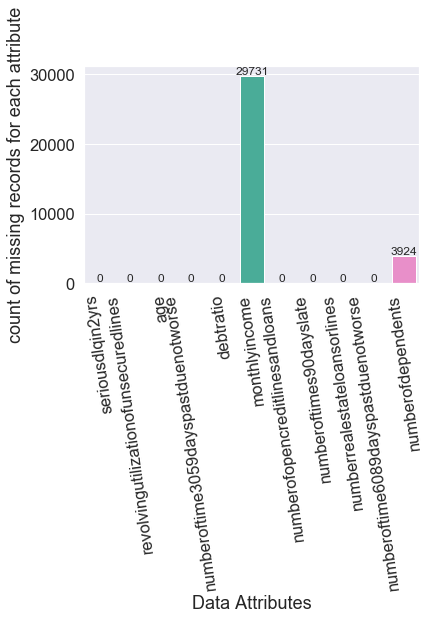

In [16]:
x = training_data.columns
y = training_data.isnull().sum()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=98)
plt.show()

In [17]:
# 결측값을 '평균값' 으로 교체
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [18]:
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [19]:
# 결측값을 '중위값' 으로 교체
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [20]:
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [21]:
# correlation이라는 용어는 수량 사이의 관계(relationship) 또는 연관성(association)을 의미한다.
training_data.fillna((training_data.median()), inplace=True)
# Get the correlation of the training dataset
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


# Corr 차트표현

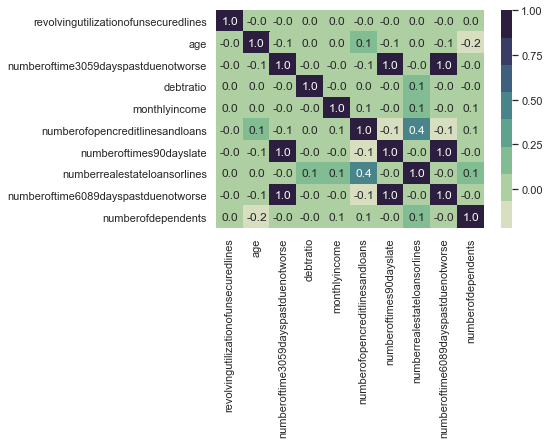

In [22]:
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(), annot=True, fmt=".1f",
           cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

# 아웃라이어(Outliers, 이상점) 검출
## 이상점 검출방법에는 아래 다섯가지 방법이 있다.
- 1) 백분위수 기반의 이상점 검출
- 2) 중위 절대 편차 (혹은 modified Z-score)기반
- 3) 표준편차와 평균 기반
- 4) 다수결 투표 기반 (모든 방법 동원 후 투표수 많은 방식으로 봄)
- 5) 이상점의 시각화

In [23]:
# 백분위수 기반의 이상점 검출
# 95 분계점(threshold)를 정해 백분위수 범위를 도출함
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [24]:
# 중위 절대 편차 (혹은 modified Z-score)기반
#def mad_based_outlier(points, threshold=3.5):
#    if len(points.shape) == 1:
#        points = points[:, None]
#    median_y = np.median(points)
#    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
#    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
#                        for y in points]
    
#    return np.abs(modified_z_scores) > threshold



def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

In [25]:
# 표준편차와 평균 기반 
# 여기서는 임의의 분계점인 '3'을 선택
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#std_div(data=training_data.age)

In [26]:
# 다수결 투표 기반 (모든 방법 동원 후 투표수 많은 방식으로 봄)
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))  
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

# 아웃라이어(Outliers, 이상점) 시각화

In [27]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in list(zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote])):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

# 이상점(Outlier, 아웃라이어) 다루기
- 데이터 특성을 하나씩 살펴본다

In [28]:
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


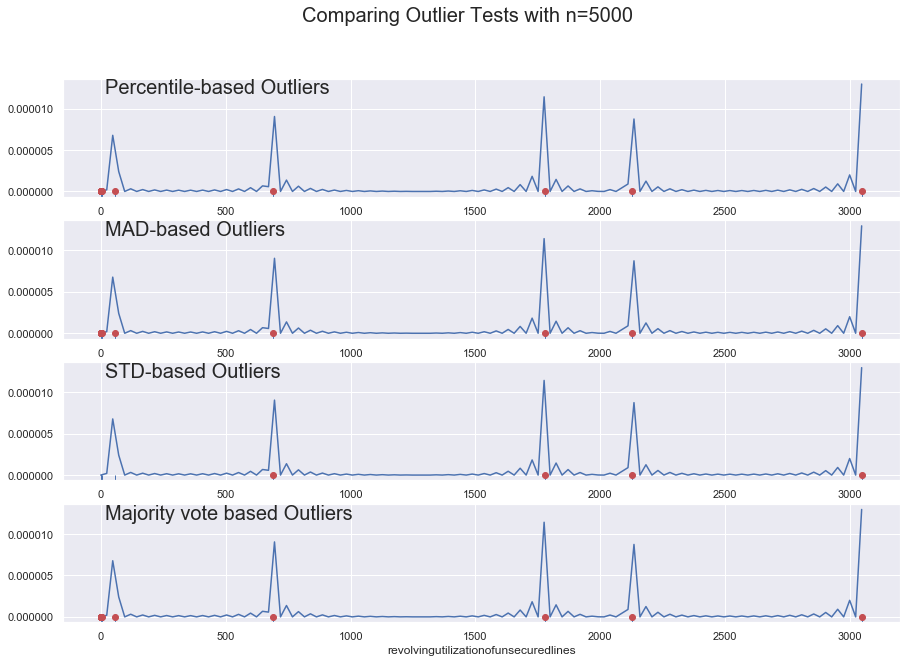

In [29]:
import numpy as np

# 표본의 크기를 5,000(Randomly)으로 선택
# 신용카드한도. Percentage
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

In [30]:
# 위값을 0.99999 이상인 값이 이상점으로 간주된다. 이를 대체연산(Replacement Operation)한다.
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

# 나이 아웃라이어

In [31]:
# 연령의 도수분포 보기
# 나이는 가장 어린 것이 21살이다. 0인값을 22로 대체한다.
import collections
collections.Counter(training_data.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

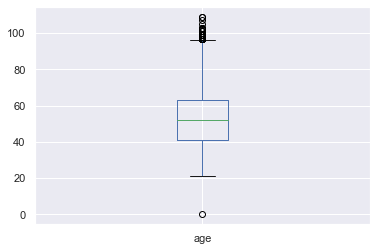

In [32]:
# 도수분포 보기
training_data.age.plot.box()

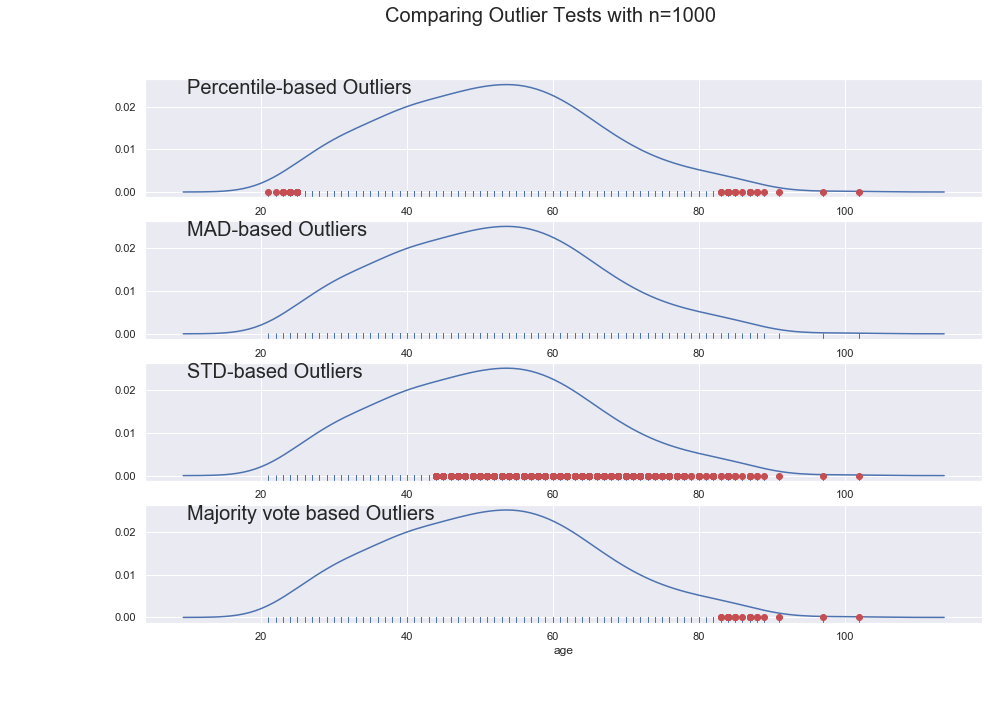

In [33]:
plotOutlier(training_data.age.sample(1000))

In [34]:
ageNew = []
for val in training_data.age:
    if val> 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
training_data.age = ageNew

In [35]:
collections.Counter(training_data.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

# 30일 ~ 59일 기한 경과횟수 아웃라이어 

C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


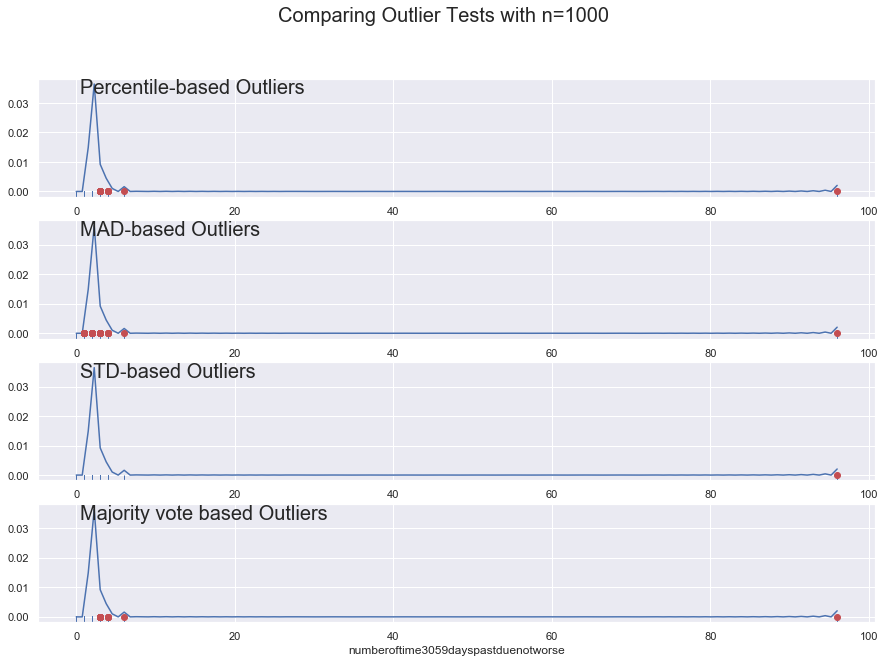

In [36]:
# 해당코드는 파이썬 2.7에서 정상적으로 동작한다.
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))

In [37]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

# 위 코드로 96회, 98회 이상점 도출

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [38]:
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

training_data.numberoftime3059dayspastduenotworse = New

In [39]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

# 96, 98을 중위값으로 대체

Counter({2.0: 4598,
         0.0: 126287,
         1.0: 16033,
         3.0: 1754,
         4.0: 747,
         5.0: 342,
         7.0: 54,
         10.0: 4,
         6.0: 140,
         12.0: 2,
         8.0: 25,
         9.0: 12,
         13.0: 1,
         11.0: 1})

# 부채비율 아웃라이어

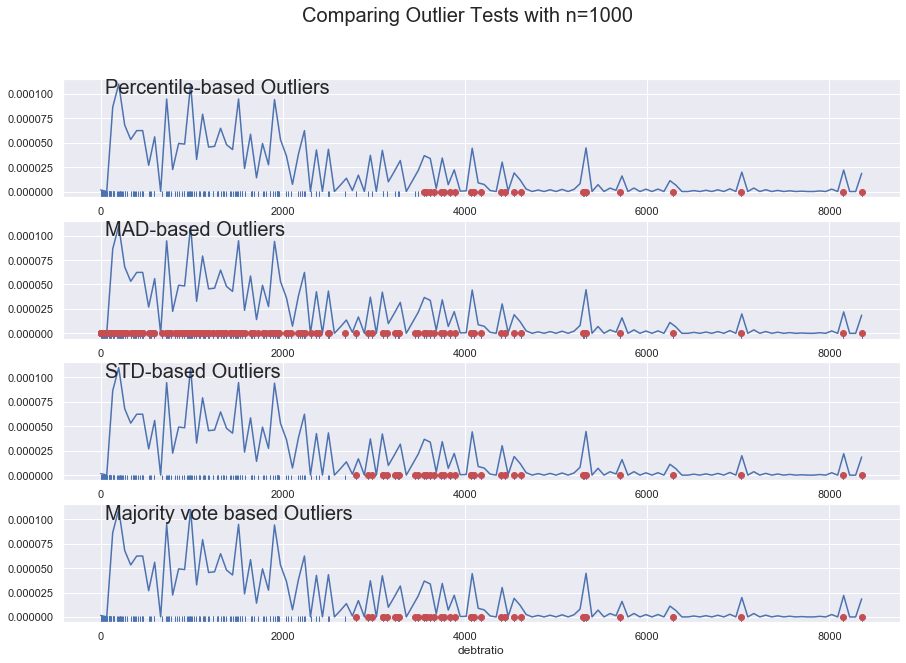

In [40]:
plotOutlier(training_data.debtratio.sample(1000))

In [41]:
# 위의 방법이 혼란스러워 각각의 방법으로 단순히 이상점을 세는 방법으로 비교분석
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict
outlierRatio(training_data.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

In [42]:
# 위의 방법에서 이상점의 최대 수는 MAD 기반 방법으로 검출된 것이다.
# 이 이상값을 대체하기 위해 최소 상계값을 찾는다.
# 최소 상계(minimum upper bound)는 이상값에서 파생된 최솟값이다.

minUpperBound = min(val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)))

newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio

# 월간소득 아웃라이어

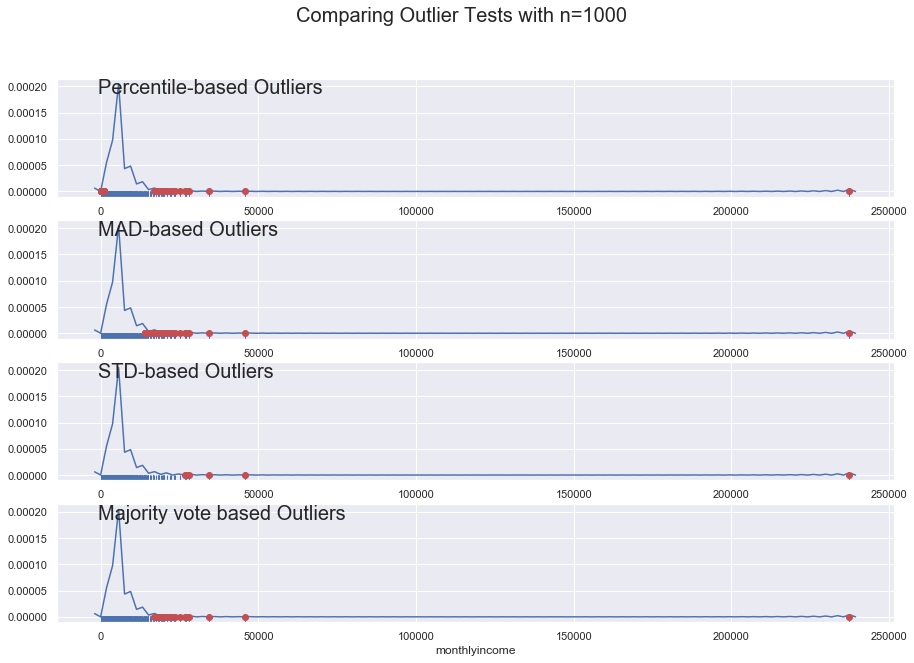

In [43]:
plotOutlier(training_data.monthlyincome.sample(1000))

# 여기서는 투표기반 방법을 쓸 것이다

In [44]:
collections.Counter(training_data.monthlyincome)

Counter({9120.0: 4,
         2600.0: 454,
         3042.0: 10,
         3300.0: 364,
         63588.0: 1,
         3500.0: 1360,
         5400.0: 30062,
         23684.0: 1,
         2500.0: 1551,
         6501.0: 10,
         12454.0: 3,
         13700.0: 33,
         0.0: 1634,
         11362.0: 3,
         8800.0: 148,
         3280.0: 17,
         333.0: 6,
         12300.0: 42,
         3000.0: 1758,
         7916.0: 177,
         2416.0: 43,
         4676.0: 8,
         8333.0: 543,
         3400.0: 422,
         5500.0: 897,
         4200.0: 569,
         750.0: 44,
         7000.0: 1223,
         2230.0: 14,
         11000.0: 450,
         4000.0: 2106,
         1000.0: 367,
         5700.0: 282,
         9250.0: 77,
         3661.0: 2,
         1.0: 605,
         16800.0: 10,
         3133.0: 12,
         1937.0: 4,
         13000.0: 290,
         6900.0: 159,
         5750.0: 123,
         2231.0: 3,
         13793.0: 1,
         3216.0: 14,
         5813.0: 7,
         7783.

In [45]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [46]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')
training_data.monthlyincome = incomeNew

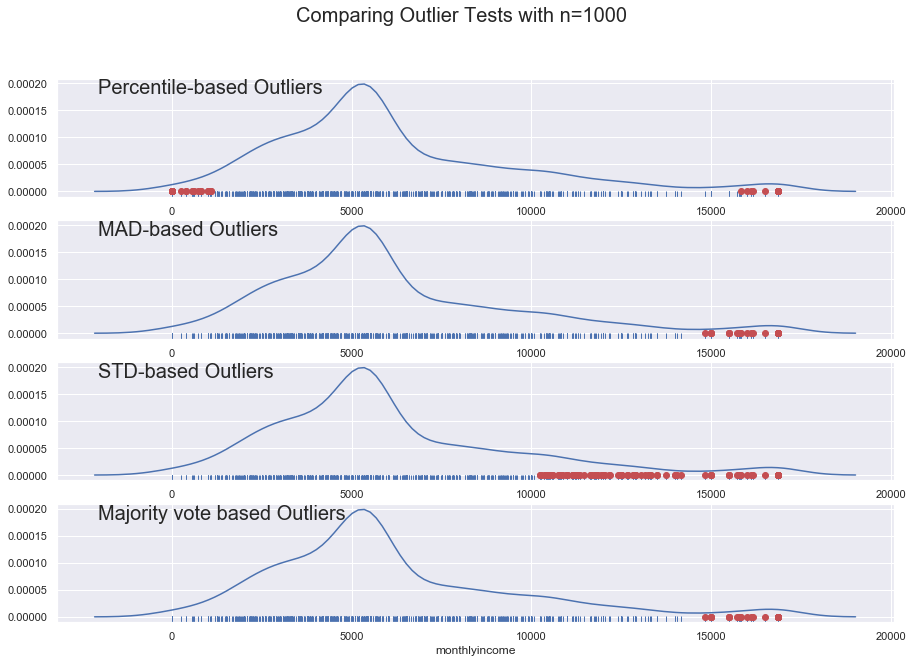

In [47]:
# 이 이상값을 대체하기 위해 최소 상계값을 찾는다.
# 최소 상계(minimum upper bound)는 이상값에서 파생된 최솟값이다.
plotOutlier(training_data.monthlyincome.sample(1000))

# 담보대출 및 한도대출 수 아웃라이어

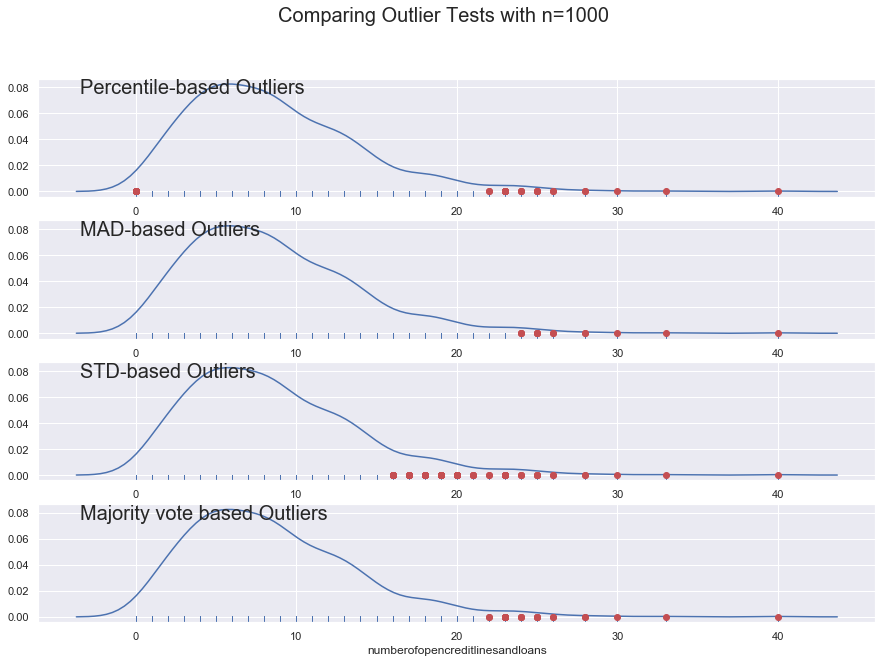

In [48]:
plotOutlier(training_data.numberofopencreditlinesandloans.sample(1000))

# 해당 건에는 이상점이 없다.

# 90일 연체횟수 아웃라이어

C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


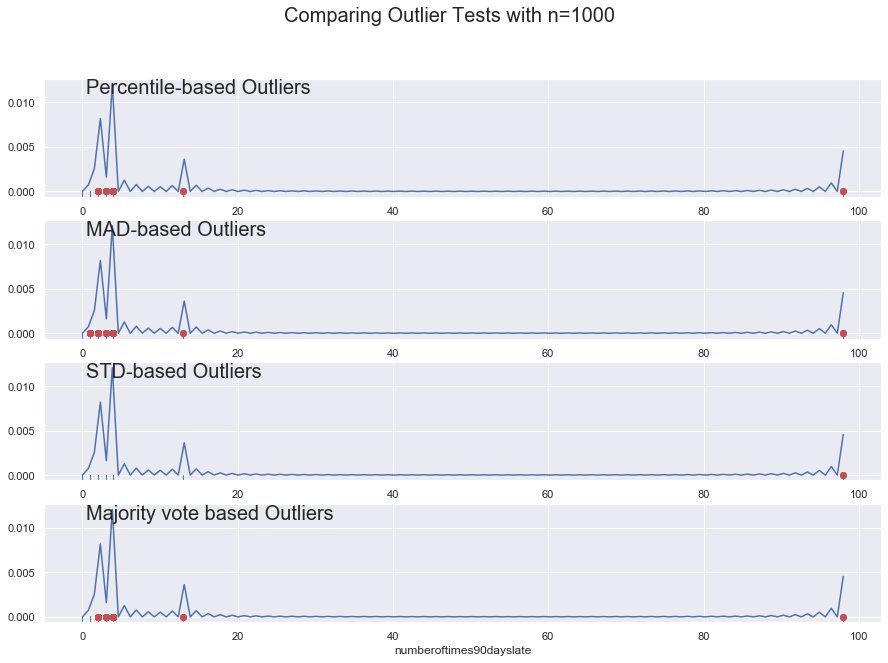

In [49]:
# 파이썬 2.7 버전에서 작동한다.

plotOutlier(training_data.numberoftimes90dayslate.sample(1000))

In [50]:
collections.Counter(training_data.numberoftimes90dayslate)

# 아래것을 참고했을 때 96, 98이 아웃라이어이다.

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [51]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [52]:
new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)
training_data.numberoftimes90dayslate = new

In [53]:
# 교정완료
collections.Counter(training_data.numberrealestateloansorlines)

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

# 담보대출 및 한도대출 수 아웃라이어

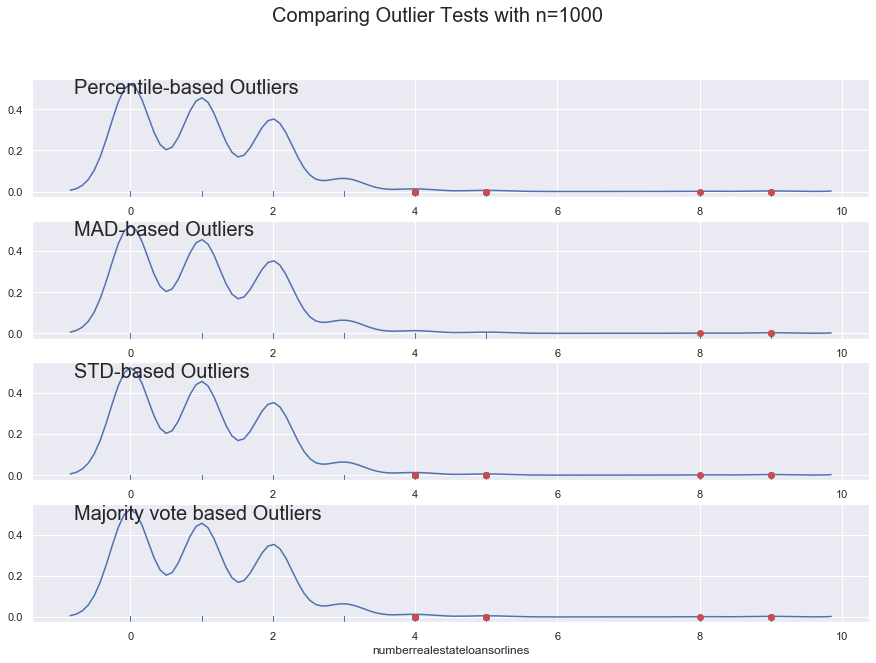

In [54]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

In [55]:
# 정렬 도입. 17 이상의 도수 값이 너무 적다. 이를 모두 17로 대체한다.
sorted(collections.Counter(training_data.numberrealestateloansorlines).items())

[(0, 56188),
 (1, 52338),
 (2, 31522),
 (3, 6300),
 (4, 2170),
 (5, 689),
 (6, 320),
 (7, 171),
 (8, 93),
 (9, 78),
 (10, 37),
 (11, 23),
 (12, 18),
 (13, 15),
 (14, 7),
 (15, 7),
 (16, 4),
 (17, 4),
 (18, 2),
 (19, 2),
 (20, 2),
 (21, 1),
 (23, 2),
 (25, 3),
 (26, 1),
 (29, 1),
 (32, 1),
 (54, 1)]

In [56]:
# 정렬 도입. 17 이상의 도수 값이 너무 적다. 이를 모두 17로 대체한다.

realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [57]:
sorted(collections.Counter(training_data.numberrealestateloansorlines).items())

[(0, 56188),
 (1, 52338),
 (2, 31522),
 (3, 6300),
 (4, 2170),
 (5, 689),
 (6, 320),
 (7, 171),
 (8, 93),
 (9, 78),
 (10, 37),
 (11, 23),
 (12, 18),
 (13, 15),
 (14, 7),
 (15, 7),
 (16, 4),
 (17, 20)]

# 60~89일 기한 경과횟수 아웃라이어

C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


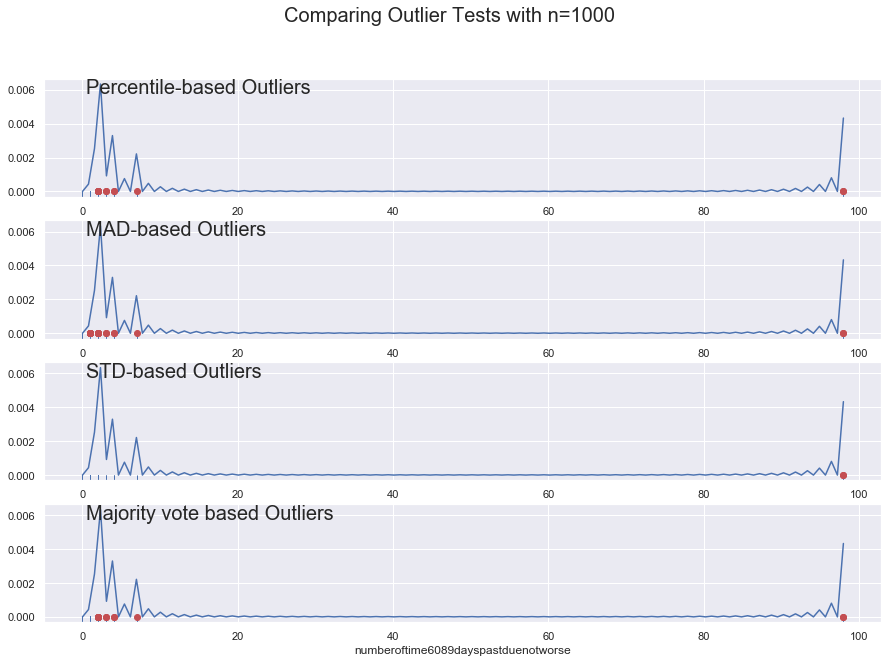

In [58]:
# 파이썬 2.7에서 작동되는 코드
plotOutlier(training_data.numberoftime6089dayspastduenotworse.sample(1000))

In [59]:
sorted(collections.Counter(training_data.numberoftime6089dayspastduenotworse).items())

# 아래 참고 역시 96.98 이 이상점이다. 

[(0, 142396),
 (1, 5731),
 (2, 1118),
 (3, 318),
 (4, 105),
 (5, 34),
 (6, 16),
 (7, 9),
 (8, 2),
 (9, 1),
 (11, 1),
 (96, 5),
 (98, 264)]

In [60]:
# 이 이상점을 중위수로 대체한다.
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse) # 65 lines에 정의된 함수를 계속 재활용
training_data.numberoftime6089dayspastduenotworse = new

In [61]:
collections.Counter(training_data.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

# 부양가족 수 아웃라이어

C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


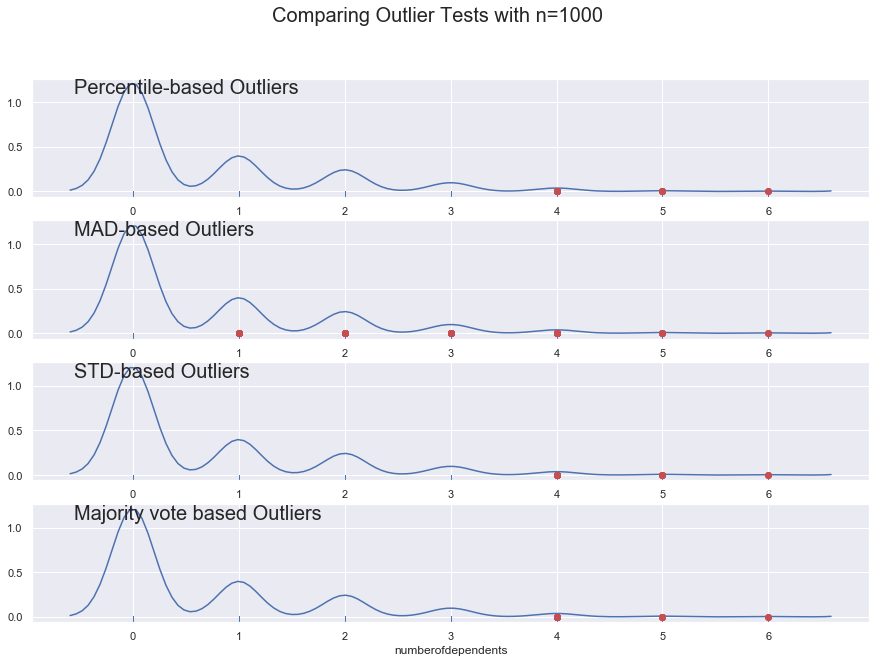

In [62]:
# 파이썬 2.7에서 작동되는 코드
plotOutlier(training_data.numberofdependents.sample(1000))

In [63]:
collections.Counter(training_data.numberofdependents)
# 10보다 큰 값이 이상점이다. 이를  10으로 대체한다.

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [64]:
depNew = []
for var in training_data.numberofdependents:
    if var >= 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [65]:
training_data.numberofdependents = depNew

In [66]:
collections.Counter(training_data.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         10.0: 7,
         9.0: 5})

# Feature Engineering

# RF 후 Feature importances 알아내기


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
training_data.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [70]:
from numba import jit, cuda 
import numpy as np 
# to measure exec time 
from timeit import default_timer as timer 

# normal function to run on cpu 
def func(a):
    for i in range(10000000): 
        a[i]+= 1

# function optimized to run on gpu 
@jit(target ="cuda")
def func2(a): 
    for i in range(10000000): 
        a[i]+= 1
if __name__=="__main__": 
    n = 10000000
    a = np.ones(n, dtype = np.float64) 
    b = np.ones(n, dtype = np.float32) 

    start = timer() 
    func(a) 
    print("without GPU:", timer()-start)	 
    
    start = timer() 
    func2(a) 
    print("with GPU:", timer()-start) 
    
    
# GPU 사용으로 인한 에러

without GPU: 6.55775349999999


C:\Users\fu\Anaconda3\lib\site-packages\numba\cuda\decorators.py:113: UserWarning: autojit is deprecated and will be removed in a future release. Use jit instead.
  warn('autojit is deprecated and will be removed in a future release. Use jit instead.')


NvvmSupportError: libNVVM cannot be found. Do `conda install cudatoolkit`:
library nvvm not found

In [69]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

KeyboardInterrupt: 

In [ ]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 1. K-NN
K는 고려할 이웃의 수이다. k = 3이면, 예측 출력이 이뤄지는 동안에 세 개의 가장 가까운 이웃점을 검사하고, 하나의 이웃이 X 범주에 속하고 두 이웃이 Y 범주에 속한다면, 가장 가까운 점의 대다수가 Y 축에 속하기 때문에 예측된 레이블은 Y가 된다.

In [72]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None)

# 2. 로지스틱 회귀

In [73]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                           class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=2)

# 3. 에이다부스트

In [74]:
adaMod=AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

# 4. 그레디언트부스팅 

In [75]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                  init=None, random_state=None, max_features=None, verbose=0)

# 5. 랜덤포레스트

In [76]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False,
                              n_jobs=1, random_state=None, verbose=0)

# --------------------------------------------------------

In [77]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [79]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [80]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

# 테스트 계량(Testing metrics)
- 평균 정확도
- ROC-AUC 점수

In [82]:
# 평균정확도
knMod.score(X_test, y_test)

0.9328

In [83]:
# AUC 점수
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.5921648616312698

In [84]:
glmMod.score(X_test, y_test)

0.9373066666666666

In [85]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.846272214596453

In [86]:
adaMod.score(X_test, y_test)

0.9354133333333333

In [87]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8524313652170886

In [88]:
gbMod.score(X_test, y_test)

0.9371466666666667

In [89]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8566950926329078

In [90]:
rfMod.score(X_test, y_test)

0.93328

In [91]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.7692826787595856

# 기존 접근법 최적화
- Cross Validation
- 하이퍼파라미터 조율

In [92]:

from sklearn.model_selection import cross_val_score

# 평균값과 정확도의 표준편차를 추적한다.

def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
        
    return cvDict



# 정규화된 평균과 표준편차 점수 확인.

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [93]:
# 평균값과 정확도의 표준편차를 추적한다.

cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.3s finished


{'KNeighborsClassifier': [0.5953340837746034, 0.0018762041694529948],
 'LogisticRegression': [0.8493630625546045, 0.0035460678781775896],
 'AdaBoostClassifier': [0.8579212870007398, 0.002045751817184185],
 'GradientBoostingClassifier': [0.8629066651371481, 0.0029501844489172057],
 'RandomForestClassifier': [0.7743861662233619, 0.0035793564457511917]}

### Hyper parameter optimization using Randomized search

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [95]:


# 하이퍼파라미터 조율. (Randomized)SearchCV
adaHyperParams = {'n_estimators': [10,50,100,200,420]}



#GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
#                  scoring='accuracy', cv=10, n_jobs=1)

In [96]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                  scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)

C:\Users\fu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.6s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   2.9s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   6.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   6.3s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.3min finished


In [97]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.8595759672584932)

In [98]:
gbHyperParams = {'loss' : ['deviance', 'exponential'], 
                'n_estimators': randint(10, 500),
                'max_depth': randint(1,10)}

In [99]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)

C:\Users\fu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=exponential, max_depth=3, n_estimators=411 .................
[CV] .. loss=exponential, max_depth=3, n_estimators=411, total=  20.2s
[CV] loss=exponential, max_depth=3, n_estimators=411 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


[CV] .. loss=exponential, max_depth=3, n_estimators=411, total=  19.4s
[CV] loss=exponential, max_depth=3, n_estimators=411 .................
[CV] .. loss=exponential, max_depth=3, n_estimators=411, total=  19.0s
[CV] loss=exponential, max_depth=1, n_estimators=369 .................
[CV] .. loss=exponential, max_depth=1, n_estimators=369, total=   6.8s
[CV] loss=exponential, max_depth=1, n_estimators=369 .................
[CV] .. loss=exponential, max_depth=1, n_estimators=369, total=   7.3s
[CV] loss=exponential, max_depth=1, n_estimators=369 .................
[CV] .. loss=exponential, max_depth=1, n_estimators=369, total=   7.0s
[CV] loss=exponential, max_depth=1, n_estimators=418 .................
[CV] .. loss=exponential, max_depth=1, n_estimators=418, total=   7.9s
[CV] loss=exponential, max_depth=1, n_estimators=418 .................
[CV] .. loss=exponential, max_depth=1, n_estimators=418, total=   7.8s
[CV] loss=exponential, max_depth=1, n_estimators=418 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.0min finished


In [100]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'deviance', 'max_depth': 2, 'n_estimators': 303}, 0.8637604486838145)

### Train models with help of new hyper parameter

In [101]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [102]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [103]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.8s finished


In [104]:
cvDictbestpara

{'GradientBoostingClassifier': [0.8621379675810698, 0.0027713758619948535],
 'AdaBoostClassifier': [0.8583086843023976, 0.0025942504437410875]}

In [105]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [106]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8563618715921093

In [107]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [108]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8521959991547271

# Feature Transformation (Log로 변환)
- 일부 데이터 특성의 값이 더 넓겨 퍼져 있다. 하나의 자연로그와 입력 특징 배열을 취한다. 

In [109]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
 
transformer = FunctionTransformer(np.log1p)  # 로그 변환
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

C:\Users\fu\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [110]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [111]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [112]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.3s finished


In [113]:
cvDictbestpara_transform 

{'GradientBoostingClassifier': [0.8621399237516739, 0.0027713242845154216],
 'AdaBoostClassifier': [0.8583086843023976, 0.0025942504437410875]}

In [114]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

C:\Users\fu\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [115]:
X_test_transform

array([[0.16529623, 3.68887945, 0.        , ..., 0.        , 0.        ,
        1.09861229],
       [0.41308149, 4.18965474, 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       [0.11924676, 4.02535169, 0.        , ..., 0.69314718, 0.        ,
        0.        ],
       ...,
       [0.01167808, 3.55534806, 0.        , ..., 0.        , 0.        ,
        1.09861229],
       [0.00599167, 4.04305127, 0.        , ..., 0.69314718, 0.        ,
        1.09861229],
       [0.69314218, 4.20469262, 0.69314718, ..., 0.        , 0.        ,
        1.38629436]])

In [116]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [117]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8563620333358755

In [118]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [119]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8521959991547271

# 최종. 투표 기반 앙상블 머신러닝 모델

In [120]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])   # GB 가중치 2, ADA 가중치 1
votingMod = votingMod.fit(X_train_transform, y_train)

In [121]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [122]:
votingMod.score(X_test_transform, y_test)

0.9372266666666667

In [123]:
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8564101232234483

In [124]:
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)],
                                voting='soft',weights=[2,1])  # GB 가중치 2, ADA 가중치 1
                                                                # 협력할 수 있게 투표 파라미터는 soft로.
votingMod_old = votingMod.fit(X_train, y_train)

In [125]:
test_labels = votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [126]:
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8564105969016202

#  !! 실제 테스트 데이터에서 머신러닝 모델을 실행하기

In [127]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [128]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

In [129]:
# 테스트 데이터셋에 로그 변환 수행치 않고 실행
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [130]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})

In [131]:
output.to_csv("./predictions.csv", index=False)

In [132]:
transformer = FunctionTransformer(np.log1p)  # 로그 변환
test_data_temp = np.array(test_data)
test_data_temp_transform = transformer.transform(test_data_temp)

C:\Users\fu\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [133]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod))

101503


In [134]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})

In [135]:
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)